In [1]:
import matplotlib.pyplot as plt
import shapefile   

In [2]:
!ls

App_V3                        new_tree_dectection_try_out.R
Python_Polygon_note.ipynb     test_concave_hulls.dbf
Shiny_app_version1.Rproj      test_concave_hulls.shp
V4                            test_concave_hulls.shx
cross_section_convex_hull.R


In [3]:
shp = shapefile.Reader("test_concave_hulls.shp")


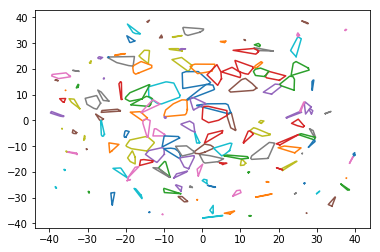

In [38]:

for shape in shp.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)

In [4]:
p1 = shp.shapeRecords()[0].shape.points

In [5]:
p1

[(-3.8577121545310007, 7.990230652891981),
 (-3.8897318226670023, 7.983385516465987),
 (-3.9113104094529945, 7.982070927985987),
 (-3.9453414707320036, 7.988799447691989),
 (-3.962163095575008, 7.992666617149993),
 (-3.969085360912004, 7.996998398222004),
 (-3.9900839462890048, 8.01169290005599),
 (-3.997392967231008, 8.095029858547989),
 (-3.995691242568995, 8.144954801569995),
 (1.0253999629279917, 13.977758443681992),
 (1.0283002339700005, 13.979962234652007),
 (1.3772321967889951, 13.979150688296002),
 (2.832397124636003, 13.757099201515999),
 (3.2323367398159917, 12.187931120995998),
 (3.232297932257012, 12.182246320933999),
 (3.179627626789994, 12.072072144638),
 (3.0261022834159945, 11.912242834004005),
 (-3.8577121545310007, 7.990230652891981)]

In [6]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [75]:
po1 = Polygon(p1)

In [68]:
from typing import List,Tuple

class TreeGrid2D:
    
    def __init__(self , shape_file_name:str):
        
        self.file_name = shape_file_name
        
        self.raw_polygon_data = self._extract_polygon_data()
        
        self.polygon_list = self._extract_polygon()
    
    def _extract_polygon_data(self)->List[List[Tuple]]:
        """The only one time open this shapefile.
        
        Read and store the list of polygon in "raw_polygon_data"
        
        Return: 
            list of polygon, where each polygon is a list of tuple,(x:float,y:float)
        """
        polygon_data = []
        
        with shapefile.Reader(self.file_name) as shp:
            
            for s in shp.shapeRecords():
                polygon = s.shape.points
                polygon_data.append(polygon)
        
        return polygon_data
                
    def _extract_polygon(self)->List[Polygon]:
        """
        Use the data from 'raw_polygon_data' to constuct
            a list of shapely.geometry.polygon.Polygon object.
            Which is useful to check in a point is contain inside 
            a given polygon.
            
        Return:
            list of "shapely.geometry.polygon.Polygon" objects.
        """
        polygon_list = []
        
        for polygon_data in self.raw_polygon_data:
            polygon_list.append(Polygon(polygon_data))
                
        return polygon_list
    
    
    def plot(self , distance_from_center:int = 40, fig_size:tuple = (10,10))->None:
        """
        Ploting the polygons
        """
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xlim([-distance_from_center, distance_from_center])
        ax.set_ylim([-distance_from_center, distance_from_center])
        patches = []


        for i in range(len(self.raw_polygon_data)):
        #     polygon = pltPolygon(np.random.rand(num_sides ,2), True)
            polygon = pltPolygon(np.array(self.raw_polygon_data[i]), True)
            patches.append(polygon)

        p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

        # colors = 100*np.random.rand(len(patches))
        # p.set_array(np.array(colors))

        ax.add_collection(p)

        plt.show()
        
    
            

In [108]:
g = TreeGrid2D('test_concave_hulls.shp')

In [109]:
g.raw_polygon_data[0]

[(-3.8577121545310007, 7.990230652891981),
 (-3.8897318226670023, 7.983385516465987),
 (-3.9113104094529945, 7.982070927985987),
 (-3.9453414707320036, 7.988799447691989),
 (-3.962163095575008, 7.992666617149993),
 (-3.969085360912004, 7.996998398222004),
 (-3.9900839462890048, 8.01169290005599),
 (-3.997392967231008, 8.095029858547989),
 (-3.995691242568995, 8.144954801569995),
 (1.0253999629279917, 13.977758443681992),
 (1.0283002339700005, 13.979962234652007),
 (1.3772321967889951, 13.979150688296002),
 (2.832397124636003, 13.757099201515999),
 (3.2323367398159917, 12.187931120995998),
 (3.232297932257012, 12.182246320933999),
 (3.179627626789994, 12.072072144638),
 (3.0261022834159945, 11.912242834004005),
 (-3.8577121545310007, 7.990230652891981)]

In [110]:
np.array(g.raw_polygon_data[0])

array([[-3.85771215,  7.99023065],
       [-3.88973182,  7.98338552],
       [-3.91131041,  7.98207093],
       [-3.94534147,  7.98879945],
       [-3.9621631 ,  7.99266662],
       [-3.96908536,  7.9969984 ],
       [-3.99008395,  8.0116929 ],
       [-3.99739297,  8.09502986],
       [-3.99569124,  8.1449548 ],
       [ 1.02539996, 13.97775844],
       [ 1.02830023, 13.97996223],
       [ 1.3772322 , 13.97915069],
       [ 2.83239712, 13.7570992 ],
       [ 3.23233674, 12.18793112],
       [ 3.23229793, 12.18224632],
       [ 3.17962763, 12.07207214],
       [ 3.02610228, 11.91224283],
       [-3.85771215,  7.99023065]])

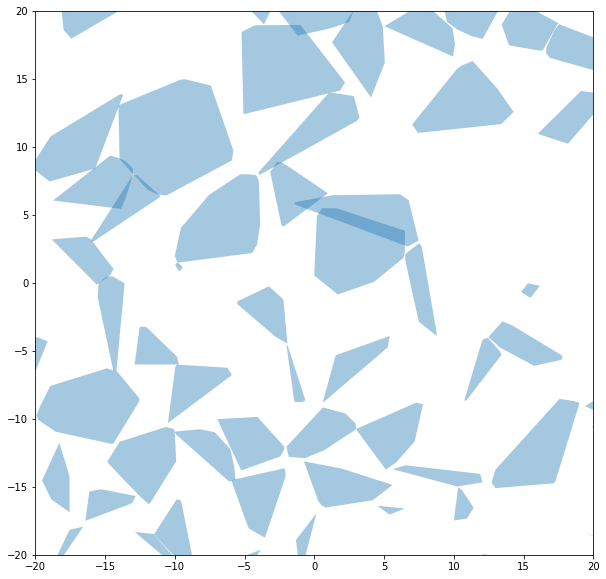

In [111]:
g.plot(distance_from_center=20)

In [26]:
np.random.rand(num_sides ,2)

array([[0.79809112, 0.723877  ],
       [0.93045202, 0.99482332],
       [0.43983309, 0.34587468],
       [0.06299315, 0.03725425],
       [0.28610819, 0.14130412]])

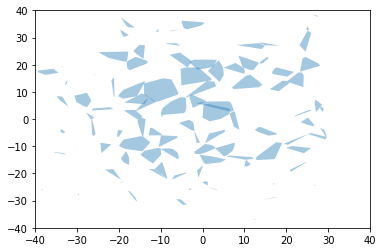

In [36]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon as pltPolygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()
ax.set_xlim([-40, 40])
ax.set_ylim([-40, 40])
patches = []
num_polygons = 100
num_sides = 5

for i in range(num_polygons):
#     polygon = pltPolygon(np.random.rand(num_sides ,2), True)
    polygon = pltPolygon(np.array(g.raw_polygon_data[i]), True)
    patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

# colors = 100*np.random.rand(len(patches))
# p.set_array(np.array(colors))

ax.add_collection(p)

plt.show()

In [476]:
def generate_list_of_points(polygon:Polygon , width:float = 0.5)->List[Point]:
    """
    Parameters
        polygon:
        width:
    Retrun
        list of Points, to test if these points inside the polygon.
    """
    # Returns minimum bounding region (minx, miny, maxx, maxy)
    bounds = polygon.bounds
    minx = np.floor(bounds[0])
    miny = np.floor(bounds[1])
    maxx = np.ceil(bounds[2])
    maxy = np.ceil(bounds[3])
    
    return _generate_list_of_points_in_square(minx,maxx,miny,maxy ,width)


def _generate_x_y_axis_sequence(minx:float , maxx:float ,\
                                      miny:float,maxy:float, width:float)->Tuple:
    """
    Return
        Tuple of np.array
    """
    x_axis = np.arange(minx + width/2,maxx + width,width)
    
    y_axis = np.arange(miny + width/2,maxy + width,width)
    
    return(x_axis,y_axis)

def _generate_list_of_points_in_square(minx:float , maxx:float ,\
                                      miny:float,maxy:float,width:float)->List[Point]:
    """
    Return
        List of points inside the square specified by the four points.
        (Note: the points on boundaries of maxx and maxy are included)
    """
    x_axis,y_axis = _generate_x_y_axis_sequence(minx,maxx ,miny,maxy,width)
    
    # All combinations of x_axis and y_axis values
    point_grid = np.array(np.meshgrid(x_axis , y_axis)).T.reshape(-1,2)
    
    assert(point_grid.shape[0] == len(x_axis) * len(y_axis))
    
    point_list = [Point(d) for d in point_grid]
    return point_list
    
def generate_list_of_blocked_points(polygon:Polygon,width:float)->List[Point]:
    """
    """
    point_list = generate_list_of_points(polygon , width)
    points_in_polygon = [p for p in point_list if polygon.contains(p)]
    
    return points_in_polygon

def mapping_from_point_to_cell(x_axis_used:List[float] , y_axis_used:List[float]\
                               , x:float,y:float)->Tuple[int,int]:
    
    x_cell_axis = x_axis_used.index(x)
    y_cell_axis = y_axis_used.index(y)
    
    return(x_cell_axis , y_cell_axis)

def make_polygon(minx, miny, maxx, maxy)->Polygon:
    
    return Polygon([[minx,miny] , [minx,maxy],[maxx,maxy] , [maxx,miny]])

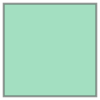

In [477]:
minx = -40
miny = -40
maxx = 40
maxy = 40 
width = 0.5
whole_grid = Polygon([[-40,-40] , [-40,40],[40,40] , [40,-40]])
whole_grid

In [478]:
all_points = generate_list_of_points(whole_grid,0.5)
len(all_points)

25921

In [479]:
x_axis,y_axis = _generate_x_y_axis_sequence(minx,maxx ,miny,maxy,width)

In [480]:
x_axis

array([-39.75, -39.25, -38.75, -38.25, -37.75, -37.25, -36.75, -36.25,
       -35.75, -35.25, -34.75, -34.25, -33.75, -33.25, -32.75, -32.25,
       -31.75, -31.25, -30.75, -30.25, -29.75, -29.25, -28.75, -28.25,
       -27.75, -27.25, -26.75, -26.25, -25.75, -25.25, -24.75, -24.25,
       -23.75, -23.25, -22.75, -22.25, -21.75, -21.25, -20.75, -20.25,
       -19.75, -19.25, -18.75, -18.25, -17.75, -17.25, -16.75, -16.25,
       -15.75, -15.25, -14.75, -14.25, -13.75, -13.25, -12.75, -12.25,
       -11.75, -11.25, -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,
        -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,
        -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,
         0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,
         4.25,   4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,
         8.25,   8.75,   9.25,   9.75,  10.25,  10.75,  11.25,  11.75,
        12.25,  12.75,  13.25,  13.75,  14.25,  14.75,  15.25,  15.75,
      

In [481]:
point_grid = np.array(np.meshgrid(x_axis , y_axis)).T.reshape(-1,2)

In [482]:
x,y = point_grid[2]

In [483]:
mapping_from_point_to_cell(x_axis.tolist() , y_axis.tolist() ,x,y )

(0, 2)

In [484]:
matrix_cells = [[0 for i in range(len(x_axis))] for j in range(len(y_axis))]

In [485]:
## For each polygon, find all the blocked points.
## For each blocked point map it to the matrix cell.

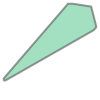

In [486]:
po1 = g.polygon_list[0]
po1

In [487]:
blocked_points = generate_list_of_blocked_points(po1,width=0.5)
print(len(blocked_points))

55


In [488]:
point1 = blocked_points[3]

In [489]:
point1.x , point1.y

(-2.75, 9.25)

In [490]:
## The following cell should be blocked.
mapping_from_point_to_cell(x_axis.tolist() , y_axis.tolist(),point1.x , point1.y)

(74, 98)

### Testing with a single polygon

In [491]:
minx, miny, maxx, maxy = po1.bounds
all_points = generate_list_of_points(whole_grid,0.5)
print(len(all_points))

25921


In [492]:
matrix_cells = [[0 for i in range(len(x_axis))] for j in range(len(y_axis))]

blocked_points = generate_list_of_blocked_points(po1 , x_axis_used=x_axis,\
                                                y_axis_used=y_axis,width=width)

K,J = len(x_axis)-1,len(y_axis)-1
for p in blocked_points:
   
    x,y = mapping_from_point_to_cell(x_axis.tolist() , y_axis.tolist(),p.x , p.y)
    matrix_cells[J-y][x] = 1

TypeError: generate_list_of_blocked_points() got an unexpected keyword argument 'x_axis_used'